# Grupo Dalet:

## Integrantes:

- Ávila Hernández, Carlos Roberto [00032420]
- Hernández García, Anibal Ernesto [00401117]
- Mejía Hércules, Francisco Javier [00079517]
- Rodríguez Ponce, Erika Liliana [00106416]

### Tema: Curvas paramétricas, curvas de Bézier


# Curvas Paramétricas

Las curvas o trayectorias en el plano xy no siempre son la gráfica de una función o de una sola ecuación. A veces, estas curvas o trayectorias se describen con un par de ecuaciones, $x = f(t)$ y $y = g(t)$, donde $f$ y $g$ son funciones continuas. Ecuaciones como éstas describen curvas más generales que las descritas por una sola función, y los valores del parámetro $t$ indican la posición $(x,y) = (f(t), g(t))$ [1]. 

## Interpolación de Lagrange

Una técnica sencilla para determinar un polinomio o un polinomio por tramos para conectar los puntos $(x_0,y_0)$, ..., $(x_n,y_n)$ en el orden provisto consiste en usar un parámetro $t$ en un intervalo $[t_0,t_n]$, donde $t_0 < t_1 <$ ... $< t_n$ y construir funciones de aproximación con $x_i = x(t_i)$ y $y_i = y(t_i)$, para cada $i = 0,1,...,n$ [2].

Recordemos [3] que los polinomios de interpolación de lagrange están dados por:

$P(x) = f(x_0)L_{n,0}(x) + ... + f(x_n)L_{n,n}(x) = \sum_{k=0}^n f(x_k)L_{n,k}(x)$,

donde para cada $k = 0,1,...,n,$

$L_{n,k} = \frac{(x-x_0)(x-x_1)...(x-x_{k-1})(x-x_{k+1})...(x-x_n)}{(x_k-x_0)(x_k-x_1)...(x_k-x_{k-1})(x_k-x_{k+1})...(x_-x_n)}  = \prod\limits_{\substack{i=0 \\ i\neq k}}^n \frac{(x-x_i)}{(x_k-x_i)}$


A continuación de aborda un ejemplo con esta técnica en el caso de que ambas funciones, $x(t)$ y $y(t)$ son polinomios de interpolación de Lagrange con los siguientes puntos de interés, para aproximar la siguiente curva:

![img](img/eg1.png)

| i |  0 | 1  | 2  | 3  | 4 |
|:---:|:---:|:---:|:---:|:---:|:---:|
| $t_i$  |  0 | 0.25  | 0.5  | 0.75  | 1 |
|  $x_i$ | 1  | -1  | 5  | 5  | -3 |
|  $y_i$ | 6| -6| 3|-5|-10|

(Existe flexibilidad al seleccionar el parámetro y nosotros en este caso elegiremos los puntos ${\{t_i\}^4_{i=0}}$) igualmente espaciados en el intervalo $[0,1]$.

Primero, se importan las librerías necesarias y se definen las variables que se usarán para las operaciones simbólicas:

In [ ]:
import sys
!{sys.executable} -m pip install numpy

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib

In [ ]:
import sys
!{sys.executable} -m pip install sympy

In [272]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol,Rational,lambdify


x = Symbol('x')
y = Symbol('y')
t = Symbol('t')

Se define le función que retorna los polinomios base de Lagrange:

In [273]:
def lagrange_l(n, ts, k):
    l = 1
    for i in range(n + 1):
        if i != k:
            l *= (t - ts[i]) / (ts[k] - ts[i])
    return l

Se define la función que retorna el polinomio interpolante de Lagrange:

In [274]:
def lagrange_p(n, ts, f):
    p = 0
    for k in range(n + 1):
        p += f[k] * lagrange_l(n, ts, k)
    return p

Se definen los arreglos con los valores del parámetro $t$, y los valores nodales de $x$ y $y$:

In [275]:
xs = [1, -1, 5,5,-3]
ys = [6, -6, 3,-5,-10]
# Divisiónes equiespaciadas del parámetro t
ts = np.linspace(0, 1, len(xs))

Se construyen los polinomios interpolantes:

In [276]:
pol_x = lagrange_p(len(ts) - 1, ts, xs)
pol_y = lagrange_p(len(ts) - 1, ts, ys)

En este caso, se obtiene lo siguiente:

$x(t) = 128t^4 - \frac{1024t^3}{3} + 264t^2 - \frac{164t}{3} + 1$

$y(t) = \frac{1856t^4}{3} - \frac{4000t^3}{3} + \frac{2692t^2}{3} - \frac{596t}{3} + 6$

Finalmente, se gafica el resultado:

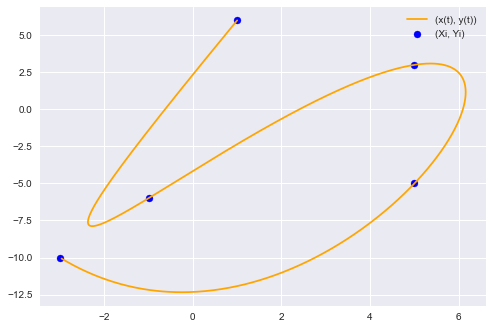

In [278]:
def show_lagrange(pol_x, pol_y):
    pol_x = lambdify(t, pol_x)
    pol_y = lambdify(t, pol_y)

    plt.figure(1)

    dom_graph = ts
    dom = np.arange(min(dom_graph), max(dom_graph), 10 ** -3)
    plt.style.use("seaborn")

    x_poly = [pol_x(t) for t in dom]
    y_poly = [pol_y(t) for t in dom]
    plt.plot(x_poly, y_poly, label="(x(t), y(t))", color="orange")
    plt.scatter(xs, ys, label='(Xi, Yi)', color="blue")
    plt.legend()
    plt.grid(True)
    plt.show()

show_lagrange(pol_x, pol_y)

---


La misma técnica puede ser implementada en tres dimensiones. Por ejemplo, se desea aproximar esta curva:

![img](img/eg3d1.png)


La cual tiene los siguiente puntos de interés:


| i |  0 | 1  | 2  | 3  |
|:---:|:---:|:---:|:---:|:---:|
| $t_i$  | 0| 1/3 | 2/3 | 1 | 
| $x_i$  | -4| 2| -3| 4 | 
|  $y_i$ | 0|-2|4|4 | 
|  $z_i$ | 1| -2| 2| 0 | 

Se defines los arreglos nodales:

In [266]:
xs = [-4,2,-3,4]
ys = [0,-2,4,4]
zs = [1, -2, 2, 0]
# Divisiónes equiespaciadas del parámetro t
ts = np.linspace(0, 1, len(xs))

Se construyen los polinomios interpolantes:

In [268]:
pol_x = lagrange_p(len(ts) - 1, ts, xs)
pol_y = lagrange_p(len(ts) - 1, ts, ys)
pol_z = lagrange_p(len(ts) - 1, ts, zs)

En este caso, se obtienen los siguientes polinomios:

$x(t) = 103.5t^3 - 153t^2 + 57.5t - 4$


$y(t) = -63t^3 + 99t^2 - 32t$


$z(t) = -58.5t^3 + 90t^2 - 32.5t + 1$

Se muestra la gráfica:

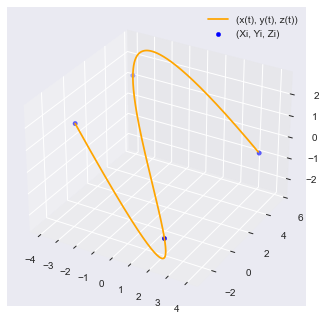

In [269]:
pol_x = lambdify(t, pol_x)
pol_y = lambdify(t, pol_y)
pol_z = lambdify(t, pol_z)

dom_graph = ts
dom = np.arange(min(dom_graph), max(dom_graph), 10 ** -3)

x_poly = [pol_x(t) for t in dom]
y_poly = [pol_y(t) for t in dom]
z_poly = [pol_z(t) for t in dom]

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x_poly, y_poly, z_poly, label='(x(t), y(t), z(t))', color="orange")
ax.scatter(xs, ys, zs,  label='(Xi, Yi, Zi)', color="blue")
ax.legend()

plt.show()

### Desventajas de su uso

Un sistema de diseño computacional exitoso necesita estar basado en una teoría matemática formal, de tal manera que los resultados sean predecibles, pero esta teoría debería realizarse en segundo plano para que el artista pueda basar el diseño en la estética. 

En general, la interpolación de Lagrange es poco óptima si se usa con una gran cantidad de nodos, ya que si se aumenta el número de puntos a interpolar, también lo hace el grado del polinomio interpolador (y en este caso son dos) por norma general. De este modo, aumenta la dificultad del cálculo, y lo hace muy poco operatico manualmente. 

A pesar de que la tecnología actual permite manejar polinomios de grados superiores sin problemas, lo hace a costa de un elevado consumo de tiempo de computación. A medida crece el grado, mayores son las oscilaciones entre puntos consecutivos o nodos.

Las aplicaciones de gráficas computacionales requieren la generación rápida de curvas suaves que se pueden modificar de manera fácil y rápida. Por razones tanto estéticas como computacionales, cambiar una parte de estas curvas debería tener un efecto pequeño o ningún efecto en otras partes de las curvas. Esto elimina el uso de polinomios de interpolación ya que cambiar una parte de la curva la afecta en su totalidad. 

A continuación se muestra un ejemplo de ello. 

Supongamos que se desea interpolar la siguiente gráfica mediante polinomios ya sea de Lagrange, Newton o de Hermite: 

![img](img/eg.png)

Para la cual se extraen los siguientes datos nodales:

| i   |  0  | 1   | 2   | 3   | 4   |5    |6    |7    |8    |9    |10   |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$t_i$|  0  |-3   |-4   |-3   |-2   |0    |2    |3    |4    |3    |0    |
|$y_i$| -40 |-30  |-4   | 3   |-2   |0    |-2   |3    |-4   |-30  |-40  |

Definimos los arreglos con los datos:

In [279]:
xs = [0,-3,-4,-3,-2,0,2,3,4,3,0]
ys = [-40,-30,-4,3,-2,0,-2,3,-4,-30,-40]

# Divisiónes equiespaciadas del parámetro t
ts = np.linspace(0, 1, len(xs))

Se construyen los polinomios interpolantes:

In [280]:
pol_x = lagrange_p(len(ts) - 1, ts, xs)
pol_y = lagrange_p(len(ts) - 1, ts, ys)

Para empezar, se obtienen unos polinomios exageradamente extensos: 


$x(t) = -1.04773789644241^{-9}t^{10} + 66137.5661375716t^9 - 297619.047619061t^8 + 561507.936507948t^7 - 576388.888888896t^6 + 349166.666666672t^5 - 126388.88888889t^4 + 26190.2116402118t^3 - 2678.17460317461t^2 + 72.6190476190482t$


$y(t) = -3858024.69135802t^{10} + 19290123.4567901t^9 - 41263227.5132275t^8 + 49312169.3121693t^7 - 36046990.7407407t^6 + 16566898.1481481t^5 - 4726503.08641975t^4 + 792126.543209877t^3 - 69038.9682539683t^2 + 2467.53968253968t - 40.0$

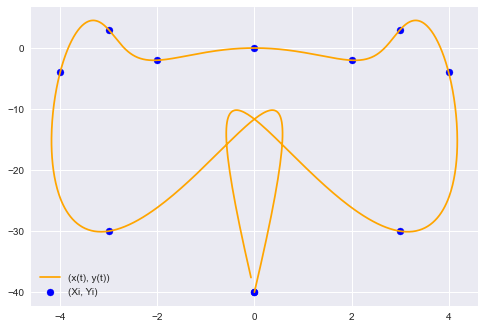

In [281]:
show_lagrange(pol_x, pol_y)

Y al graficarlo, podemos notar que no se asemeja a la curva original que se deseaba aproximar, debido a las grandes oscilaciones producidas por el alto grado polinomial. 

# Cúbicos de Hermite

Si $f \in C^1[a,b]$ y $x_o,...,x_n \in [a,b]$ son distintos, el único polinomio de menor grado que concuerda con $f$ y $f'$ en $x_0,...,x_n$ es el polinomio de Hermite de grado a lo sumo $2n + 1$ dado por

$H_{2n+1}(x) = \sum_{j=0}^n f(x_j)H_{n,j} + \sum_{j=0}^n f'(x_j)\hat{H}_{n,j} (x)$,

Donde cada $L_{n,f}(x)$ denota el $j-$ésimo coeficiente del polinomio de Lagrange de grado $n$, y 

$H_{n,j}(x) = [1-2x(x-x_i)L_{n,j}'(x_j)]L_{n,j}^2(x)$ y $\hat{H}_{n,j}(x) = (x-x_i)L_{n,j}^2(x)$. [4]

La selección de la curva para usarla en gráficas computacionales es, en general, una forma de polinomio Hermite cúbico por tramos. Cada parte de un polinomio de Hermite cúbico de completa totalmente al especificar sus extremos y las derivadas en estos extremos. Gracias a esto, una parte de la curva se puede cambiar, mientras la otra parte de la curva se mantiene igual. ünicamente se deben modificar las partes adyacentes para garantizar la suavidad en lso extremos. Estos cálculo se pueden realizar rápidamente y es posible cambiar una sección de la curva a la vez. [2]

Sin embargo, la necesidad de especificar las derivadas en los extremos de cada sección de la curva representa un problema. Si suponemos que la curva tiene $n+1$ puntos de la forma $(x(t_0), y(t_0), ..., x(t_n), y(t_n))$ y se desea parametrizar el cúbico para permitir características complejas. Entonces, se debería especificar $x'(t_i)$ y $y'(t_i)$, para cada $i =0,1,...,n$. La ventaja es que cada parte se genera de manera independiente, y se debe garantizar que las derivadas en los extremos de cada parte coincidan. Entonces, se podría simplificar el proceso en uno que determine algunos polinomios de Hermite cúbicos en el parámetro $t$, donde $t_0 = 0$ y $t_1 = 1$, los datos nodales del extremo $(x(0),y(0))$ y $(x(1),y(1))$ y sus derivadas $\frac{dy}{dx}$ en $(t=0)$ $\frac{dy}{dx}$ en $(t=1)$. [2]

Los polinomios cúbicos en $x(t)$ y $y(t)$, cada uno tiene cuatro parámetros, lo cual proporciona flexibilidad al seleccionar el par cúbico de polinomios de Hermite para satisfacer las condiciones ya que la forma natural para determinar $x(t)$ y $y(t)$ requiere que se especifique $x'(0)$, $x'(1)$, $y'(0)$, y $y'(1)$. La curva de Hermite explícita en $x$ y $y$ requiere expresar solamente los cocientes: 

$\frac{dy}{dx}(t = 0)=\frac{y'(0)}{x'(0)}$ y $\frac{dy}{dx}(t = 1)=\frac{y'(1)}{x'(1)}$. [2]

Si se multiplican $x'(0)$ y $y'(0)$ por un factor de escala común, la recta tangente para la curva en $(x(0), y(0))$ permanece igual, pero la forma de la curva varía. Mientras más grande sea el factor de escala, la curva de aproximación se asemeja más a la recta tangente en las cercanías de $(x(0), y(0))$. La misma situación se presenta para el otro extremo $(x(1), y(1))$. [2]

Para simplificar más el proceso en las gráficas computacionales interactivas, la derivada en los puntos extremos se especifican mediante otros puntos, llamados puntos guía. Mientras más lejos estén estos nodos, más cerca se aproxima la curva a la recta tangente cerca del nodo.

A continuación, los nodos se presentan en $(x_0, y_0), (x_1, y_1)$, el punto guía para $(x_0, y_0)$ es  $(x_0+ \alpha_0, y_0+\beta_0)$ y el punto guía para $(x_1, y_1)$ es  $(x_1- \alpha_1, y_1-\beta_1)$:

![img](img/h1.png)


Ahora, se debe encontrar un polinomio de Hermite cúbico $x(t)$ en $[0,1]$ que satisfaga

$x(0) = x_0$, $x(1) = x_1$, $x'(0) = \alpha_0$, y $x'(1) = \alpha_1$.

Sustituyendo, el único polinomio cúbico que satisface estas condiciones es

$x(t) = [2(x_0-x_1)+(\alpha_0+\alpha_1)]t^3 + [3(x_1-x_0) - (\alpha_1+2\alpha_0)]t^2 + \alpha_0t + x_0$.[2]

De igual manera, el único polinomio cúbico que satisface

$y(0) = y_0$, $y(1) = y_1$, $y'(0) = \beta_0$, y $y'(1) = \beta_1$.

es

$y(t) = [2(y_0-y_1)+(\beta_0+\beta_1)]t^3 + [3(y_1-y_0) - (\beta_1+2\beta_0)]t^2 + \beta_0t + y_0$.[2]

A continuación se presenta un ejemplo con punto inicial en $(0,0)$, punto final en $(1,0)$ y puntos guía en $(0.5,0.5)$ y $(2,-1)$, respectivamente.

Primero, se definen los puntos: 

In [303]:
# Punto inicial
p_0 = (0,0)
# Punto guía
pg_0 = (0.5,0.5)


# Punto final
p_1 = (1,0)
# Punto guía
pg_1 = (2,-1)

Se define la función que retorna el polinomio de Hermite cúbico:

In [304]:
def hermite_cubico(p0, pg0, p1, pg1):
    # Diferencias
    a_0 = pg0 - p0
    a_1 = p1 - pg1
    return (2*(p0 - p1) + (a_0 + a_1))*t**3 + (3*(p1 - p0) - (a_1 + 2*a_0))*t**2 + (a_0)*t + (p0)

In [310]:
pol_x = hermite_cubico(p_0[0],pg_0[0] ,p_1[0], pg_1[0])
pol_y = hermite_cubico(p_0[1],pg_0[1], p_1[1], pg_1[1])

Se obtienen los siguientes polinomios:

$x(t) = -\frac{5}{2}t^3 + 3t^22 + \frac{1}{2}t$


$y(t) = \frac{3}{2}t^3 - 2t^22 + \frac{1}{2}t$

Se grafica la curva, los puntos, y las rectas guía:

In [306]:
def show_hermite(p_0, pg_0, p_1, pg_1, pol_x, pol_y):

    pol_x = lambdify(t, pol_x)
    pol_y = lambdify(t, pol_y)

    plt.figure(1)

    dom = np.arange(0, 1, 10 ** -3)
    plt.style.use("seaborn")

    plt.plot([p_0[0], pg_0[0]],[p_0[1], pg_0[1]], color="black", linestyle="dashed")
    plt.plot([p_1[0], pg_1[0]],[p_1[1], pg_1[1]], color="black", linestyle="dashed")


    l_1_min_point = p_0 if p_0[0] < pg_0[0] else pg_0
    l_1_max_point = pg_0 if pg_0[0] > p_0[0] else p_0
    
    xs = [pg_0[0], pg_1[0]]
    ys = [pg_0[1], pg_1[1]]
    plt.scatter(xs, ys, label='Puntos guía', color="black")

    xi = [p_0[0], p_1[0]]
    yi = [p_0[1], p_1[1]]
    plt.scatter(xi, yi, label='(Xi, Yi)', color="blue")
    
    x_poly = [pol_x(t) for t in dom]
    y_poly = [pol_y(t) for t in dom]
    plt.plot(x_poly, y_poly, label="(x(t), y(t))", color="orange")

    plt.legend()
    plt.grid(True)
    plt.show()

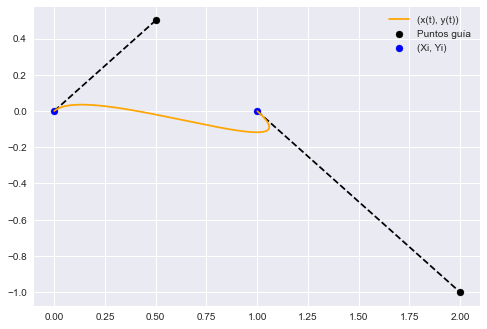

In [307]:
show_hermite(p_0, pg_0, p_1, pg_1, pol_x, pol_y)

En [2] se afirma que los programas de gráficos populares usan este tipo de sistema para sus representaciones gráficas a mano alzada en una forma ligeramente modificada. Los cúbicos de Hermite se describen como **polinomios de Bézier**, los cuales incluyen un factor de escala de tres al calcular las derivadas en los extremos. Eso modifica las ecuaciones paramétricas para 

$x(t) = [2(x_0-x_1)+3(\alpha_0+\alpha_1)]t^3 + [3(x_1-x_0) - 3(\alpha_1+2\alpha_0)]t^2 + 3\alpha_0t + x_0$.[2]

$y(t) = [2(y_0-y_1)+3(\beta_0+\beta_1)]t^3 + [3(y_1-y_0) - 3(\beta_1+2\beta_0)]t^2 + 3\beta_0t + y_0$.[2]

Para $0 \leq t \leq 1$, lo cual hace que la curva se asemeje más a las rectas tangentes en los extremos.

In [257]:
def hermite_cubico_mod(p0, pg0, p1, pg1):
    # Diferencias
    a_0 = pg0 - p0
    a_1 = p1 - pg1
    return (2*(p0 - p1) + 3*(a_0 + a_1))*t**3 + (3*(p1 - p0) - 3*(a_1 + 2*a_0))*t**2 + (3*a_0)*t + (p0)

In [258]:
pol_x = hermite_cubico_mod(p_0[0],pg_0[0] ,p_1[0], pg_1[0])
pol_y = hermite_cubico_mod(p_0[1],pg_0[1], p_1[1], pg_1[1])

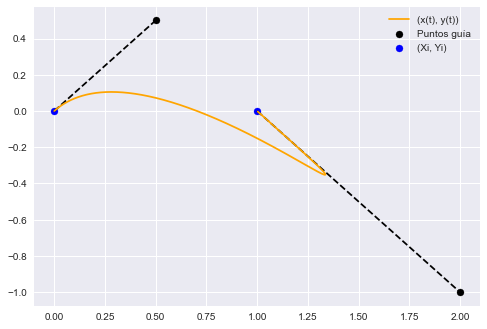

In [259]:
show_hermite(p_0, pg_0, p_1, pg_1, pol_x, pol_y)

# Curva de Bézier

Las curvas Bézier constan de al menos dos puntos Bézier y el segmento de curva que conecta los dos puntos. Una curva Bézier puede tener una sola sección o varias.
Cada punto Bézier puede tener uno o dos puntos de control. La distancia y la dirección entre estos puntos de control determinan la forma de la curva. Cuando hay dos puntos de control, uno está en la línea (punto de control en línea) y el otro es periférico con una línea que lo conecta al punto de control en línea (punto de control periférico).
Para dos puntos por el método recursivo "Algoritmo de De Casteljau", la curva es un segmento recto, definido en forma paramétrica por interpolación de los puntos extremos: $P= (u-1)P_0+uP_1$ donde $P_i$ son los puntos de control y $u\in\left[0,1\right]$ el parametro.
Se llama orden de una curva de Bézier a la cantidad de puntos de control. Para dos puntos de control, la curva es de segundo orden y de primer grado, por cada punto de control que se agrega, se agrega un paso de interpolación, en donde los terminos de $u$ quedan multiplicados por $u$ o $\left(1-u\right)$ y por tanto se aumenta en uno el grado del polinomio.
$$\left(o=n+1\right) , \left(orden=grado+1\right)$$


#### SUBDIVISIÓN

La secuencia de puntos $P_0^i(u^*)$, para un dado $u^*\in\left(0,1\right)$ fijo, sirve como polígono de control para el tramo de la curva entre $0$ y $u^*$. Es decir que cualquier punto de la curva sirve para dividirla en dos curvas Bézier, definiendo los puntos de control intermedios por medio de los puntos calculados en el algoritmo de De Casteljau.
Para demostrar que cada tramo coincide con la curva original, en el caso general se pueden demostrar fácilmente. Para el caso de las curvas hasta de tercer grado se ve directamente en el dibujo, ya que los extremos y las derivadas definen la curva.

#### CONVERGENCIA CON LA SUBDIVISIÓN

El polígono de Bézier de un segmento corto de una curva, es una buena aproximación a este segmento. Sean $b_0,...,b_n$ los puntos de Bézier de una curva $b(u)$ sobre un subintervalo $\left[c,c+nh\right]$ del intervalo $\left[a,b\right]$ y sean $c_i=c+ih$ para $i=0,...,n$. Entonces: Existe una constante $M$ que no depende de $c$ tal que: $max||b\left(c_i\right)-b_i|| \leq Mh^2$. Demostración: Expandimos el polinomio simétrico $b\left[u_1...u_n\right]$ alrededor de $\left[c_i...c_i\right]$ y evaluando en $\left[u_1...u_n\right]=\left[c^\left(n-i\right)...c*c+nh^i...c+nh\right]$ obtenemos: $$b_i=b\left[c^\left(n-i\right)...c*c+nh^i...c+nh\right]$$
$$=b\left[c_i...c_i\right]-\sum_{j=1}^{n-1}ih\frac{\partial}{\partial u_j}b\left[c_i...c_i\right]+\sum_{j=n-i+1}^{n}\left(n-i\right)h\frac{\partial}{\partial u_j}b\left[c_i...c_i\right]+\mathcal{O}\left(h^2\right)$$
Lo cual demuestra la afirmación que todas las derivadas parciales son iguales.
La convergencia cuadrática no puede ser mejorada, que se puede verificar para la parábola $p\left(u\right)=u^2$, cuyo punto de Bézier intermedio sobre $\left[0,2h\right]$ es cero y $p\left(h\right)=h^2$.


### Polinomio de Bernstein

Binomio de Newton: 

$$ (a+b)^n = \sum_{i=0}^{n}{n \choose i}a^ib^{n-i} $$

Calculo de la expasion binomial, tomando $a = t, b = 1 - t$: 

$$ 1 = (t + (1 - t))^n = \sum_{i=0}^{n}{n \choose i}t^i(1-t)^{n-1} $$

nos permite introducir los polinomios de Bernstein de grado n:  

$$ B^n_i := {n \choose i}t^i(1-t)^{n-1} $$

### Formulas

Las curvas de Bezier utilizan como base los polinomios de Bernstein

#### Fórmula lineal

$$ b(t) = P_0+(P_1-P_0)t $$

$$ b(t) = (1-t)P_0+tP1 $$

$$ t \in [0,1]  $$

#### Fórmula cuadratica

$$ b(t) = (1-t)^2P_0+2t(1-t)P_1+t^2P_2 $$

$$ t \in [0,1]  $$

#### Fórmula cúbica

La curva comienza de $P_0$ a $P_1$ y de $P_2$ a $P_3$. La distancia entre $P_0$ y $P_1$ determina la distancia que  recorre la curva en la dirección de $P_2$ antes de girar a $P_3$

$$ b(t) = P_0(1-t)^3 + 3P_1t(1-t)^2+3P_2t^2(1-t)+P_3t^3 $$

$$ t \in [0,1]  $$

#### Fórmula de n-ésima potencia

Curvas polinomicas de grado n:

$$ b(t) = \sum_{i=0}^{n} {n \choose i} P_i(1-t)^{n-1}t^i $$

$$ b(t) = \sum_{i=0}^{n} P_iB^n_i(t) $$

Siendo:

- $P_i$ : Puntos que conforman el polígono de control
- $B^n_i(t)$ : Polinomio de Bernstein de grado n
- $n$ : el grado de la curva
- $t$ : parametro de 0 a 1


Estas son las ecuaciones vectoriales. En otras palabras, podemos poner x e y en lugar de P para obtener las coordenadas correspondientes.

Por ejemplo, la curva de 3 puntos está formada por puntos (x, y) calculados como:

$ b_x(t) = (1-t)^2x_1 + 2t(1-t)x_2 + t^3x_3 $

$ b_y(t) = (1-t)^2y_1 + 2t(1-t)y_2 + t^3y_3 $


### Algoritmo de Casteljau

Una curva $b(t) =  \sum_{i=0}^{n} P_iB^n_i(t)$ se puede evaluar usando el algoritmo de de Casteljau. Esto usualmente se hace para $ t \in [0,1] $. El proceso es como sigue: usando las relaciones de recurrencia para los polinomios de Bernstein y agrupando terminos repetidamente se obtiene:

$$ b(t) =  \sum_{i=0}^{n} P_iB^n_i(t) = \sum_{i=0}^{n-1} P_iB^{n-1}_i(t) = ... = \sum_{i=0}^{0} P_i^nB^0_i(t) = P^n_0 $$

Donde:

$$ P^{k+1}_i = (1-t)P^k_i+tP^k_{i+1}$$

Si esta en [0,1] entonces la construccion de Casteljau involucra solamente combinaciones convexas, lo que da estabilidad numerica al algoritmo.

Se puede utilizar el **método de Horner** que es un algoritmo óptimo. Este método tambien puede evaluar la curva $b(t) = \sum_{i=0}^{n} P_iB^n_i(t)$. Despues de expresar $b(t)$ como:

$$ b(t) = (1-t)^n \left( \sum_{i=0}^nP_i{n \choose i}\left (\frac{t}{1-t} \right)^i \right) $$

Sin embargo esta tecnica falla cuando t está cerca de 1. Por lo que se ocupa la expresión: 

$$ b(t) = (t)^n \left( \sum_{i=0}^nP_{n-1} {n \choose i} \left(\frac{1-t}{t}\right)^i \right) $$

# Ejemplo practico de CURVAS DE BEZIER

Para nuestro ejemplo sera necesario descargar pillow, con esta libreria podremos generar una imagen y mostrar el resultado de una manera grafica

In [2]:
import sys
!{sys.executable} -m pip install pillow

Importacion de Math para la aplicacion de sus metodos

In [10]:
import math

Importamos la libreria que descargamos anteriormente y la implementamos en el codigo como PIL haciendo referencia a sus modulos "Image" e "ImageDraw" para la generacion de una grafica en 2D y representarla como una imagen

In [4]:
from PIL import Image
from PIL import ImageDraw

Estipulamos los parametros necesarios para nuestra imagen ademas de indicar que se dibujara en ese archivo

In [11]:
im = Image.new('RGB', (700, 700), (138, 138, 236)) 
draw = ImageDraw.Draw(im)

Definimos nuestras dos variables en la que ts contiene nuestro valor "t" que es un intervalo de numeros [0,1] y nuetros tres puntos en "xys" o tambien conocidos PUNTOS DE CONTROL

In [6]:
ts = [t/100.0 for t in range(101)]
#Puntos de control Bezier
xys = [(200, 100), (200, 0), (100, 0), (100, 70)]

## Funcion para CURVAS DE BEZIER

Para el siguiente codigo primero observamos nuestra funcion principal make_bezier() que nos devolvera una funcion pero tambien es aprovechada para setear una variable con la longitud de nuestra lista de puntos lo que nos da como resultado la cantidad de puntos para la creacion de la curva de bezier y su EXPRESION GENERAL para cualquier grado "n" ademas en la variable "combinations" establecemos que nuestra funcion quede en version fija para 4 puntos ya que son coeficientes para una expresion cubica extraidas del triangulo de Pascal

En nuestra funcion Bezier() tenemos la implementascion de la EXPRESION GENERAL se observa una lista vacia en el que se almacenaran cada uno de los resultados que da la multiplicacion de todo los productos a excepcion de los PUNTOS, al aplicar la expresion recursiva de la curva de Bézier de grado "n" en la que esta se representa como una combinación lineal punto a punto ( interpolación lineal ).

#### Fórmula de n-ésima potencia
$$ b(t) = \sum_{i=0}^{n} {n \choose i} P_i(1-t)^{n-1}t^i $$

Al tener nuestra expresion para la n-esima retomada de la formula Bernstein vamos a decir que la variable "combinations" = $$ {n \choose i} $$

tpowers = $$ t^i $$

upowers = $$ (1-t)^{n-1}$$

In [7]:
def make_bezier(xys):
    #(Obtenemos la cantidad de puntos) que es igual a "n"
    n = len(xys)
    
    #combination establece un version fija para 4 puntos
    #Ya que son los coeficientes extraidos del triangulo de Pascal
    combinations = (1,3,3,1)
    def bezier(ts):
        result = []
        for t in ts:
            
            #Potencias de "t"
            tpowers = (t**i for i in range(n))
            
            #Potencias del binomio
            upowers = reversed([(1-t)**i for i in range(n)])
            
            #Multiplicamos todas las expresiones que hemos generado 
            #Para crear los coeficientes de la expresion
            coefs = [c*a*b for c, a, b in zip(combinations, tpowers, upowers)]
            
            #Unimos los coneficientes con sus respectivos puntos para multiplicarlos 
            #Con esto complementarios la expresion final y los resultados son retornados
            result.append(
                tuple(sum([coef*p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))
        return result
    return bezier

Finalmente llamamos las funcion make_bezier() con sus respectivos parametros y lo almacenamos en la variable "bezier" para luego llamar a su funcion interna y sus valores de retorno guardarlos en el resultado final "points"

In [12]:
bezier = make_bezier(xys)
points=bezier(ts)

Usamos nuestra variable "draw" que contiene la funcion para dibujar e indicamos que dibuje el poligono respectivo con los puntos brindados por la funcion de Bezier, guardamos y mostramos la CURVA generada

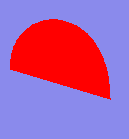

## CODIGO COMPLETO

In [ ]:
from PIL import Image
from PIL import ImageDraw

def make_bezier(xys):
    #(Obtenemos la cantidad de puntos)
    n = len(xys)
    #combination establece coeficientes Binomiales
    combinations = (1,3,3,1)
    
    def bezier(ts):
        # Usamos la formula generalizada para curvas de Bezier
        result = []
        for t in ts:
            tpowers = (t**i for i in range(n))
            upowers = reversed([(1-t)**i for i in range(n)])
            coefs = [c*a*b for c, a, b in zip(combinations, tpowers, upowers)]
            result.append(
                tuple(sum([coef*p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))
        return result
    return bezier

#Clase Main
if __name__ == '__main__':
    im = Image.new('RGB', (700, 700), (138, 138, 236)) 
    draw = ImageDraw.Draw(im)
    ts = [t/100.0 for t in range(101)]
    xys = [(200, 100), (200, 0), (100, 0), (100, 70)]
    bezier = make_bezier(xys)
    points=bezier(ts)


    draw.polygon(points, fill = 'red')
    im.save('out.png')
    im.show()

## Referencias

[1]  Hass, J., Heil, C., Weir, M., Estrugo, J. and Thomas, G., n.d. Thomas' calculus. 13th ed., pp. 641

[2] Burden, R., Faires, J. and Burden, A., 2016. Análisis numérico. 10th ed. México: Cengage Learning, pp.121-126.

[3] Burden, R., Faires, J. and Burden, A., 2016. Análisis numérico. 10th ed. México: Cengage Learning, pp.82.

[4] Burden, R., Faires, J. and Burden, A., 2016. Análisis numérico. 10th ed. México: Cengage Learning, pp.99-101.

[5] Calvo, Nestor, FICH-UNL. Available: https://cimec.org.ar/foswiki/pub/Main/Cimec/ComputacionGrafica/curvas.pdf